# Machine Learning Homework 4

## Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Input parameters

N = 50
mx1, my1 = 1, 1
vx1, vy1 = 2, 2
mx2, my2 = 10, 10
vx2, vy2 = 2, 2

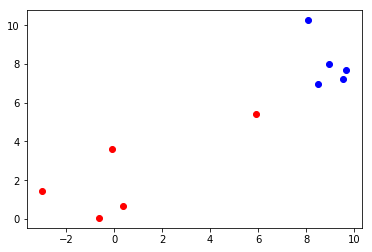

In [15]:
# Generate data points

gt_x1 = np.random.randn(N)*vx1 + mx1
gt_y1 = np.random.randn(N)*vy1 + my1

gt_x2 = np.random.randn(N)*vx2 + mx2
gt_y2 = np.random.randn(N)*vy2 + my2

x = np.append(gt_x1, gt_x2)
y - np.append(gt_y1, gt_y2)

plt.plot(gt_x1, gt_y1, 'ro')
plt.plot(gt_x2, gt_y2, 'bo')

In [16]:
# Training

w = np.ones(2)
p = np.append(np.append(x, y, axis=1), np.ones(2*N).reshape((-1, 1)), axis=1)
l = np.append(np.zeros(N), np.ones(N))

threshold = 0.001
while True:
    d_J = p.T.dot(l-(1/(1+np.exp(-p.dot(w)))))
    
    w = w + d_J
    
    print(w)

AxisError: axis 1 is out of bounds for array of dimension 1

## EM Algorithm

In [2]:
import numpy as np

In [3]:
# parse the input files

import struct

with open('./train-labels-idx1-ubyte', 'rb') as f:
    data = f.read()
    offset = 0
    fmt = '>2i'
    magic_num, num_labels = struct.unpack_from(fmt, data, offset)
    offset += struct.calcsize(fmt)
    fmt = '>{}B'.format(str(num_labels))
    labels = np.array(struct.unpack_from(fmt, data, offset))

with open('./train-images-idx3-ubyte', 'rb') as f:
    data = f.read()
    offset = 0
    fmt = '>4i'
    magic_num, num_images, height, width = struct.unpack_from(fmt, data, offset)
    image_size = height*width
    offset += struct.calcsize(fmt)
    fmt = '>{}B'.format(str(image_size))
    images = np.empty((num_images, image_size))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt, data, offset))
        offset += struct.calcsize(fmt)
        
# Preprocess input images

binning = np.vectorize(lambda x: 0 if x < 128 else 1)
images = f(binning)

In [59]:
mean = np.random.random_sample((10, 784))
pi = np.ones(10)*0.1

def zero_handling(x):
    if x == 0:
        return 0.000001
    elif x == 1:
        return 0.999999
    else:
        return x
zero_handling_v = np.vectorize(zero_handling)

for i in range(10):
    predictions = []
    w = []
    
    # Expectation step
    for img in images[:1000]:
        t = np.array([pi[k]*np.log([mean[k][l] if img[l] > 0 else (1-mean[k][l]) for l in range(784)]).sum() for k in range(10)])
        z = t/t.sum()
        w.append(z)
        predictions.append(np.argmax(z))
        
    # Maximize step
    Nm = np.sum(w, axis=0)
    for i in range(10):
        mean[i] = np.sum([w[j][i]*images[j] for j in range(1000)])/Nm[i]
    pi = Nm/1000
    
    for i in range(10):
        print(mean[i])

[ 101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.69546183  101.69546183  101.69546183  101.69546183  101.69546183
  101.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  

In [55]:
unbinning = np.vectorize(lambda x: 0 if x < 0.5 else 1)
imaginations = unbinning(mean)

for i in range(10):
    for j in range(28):
        print(imaginations[i][j*28:(j+1)*28])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0

In [8]:
print(pi)

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
